In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import math

In [38]:
df_owid = pd.read_csv('dataset/owid/owid-co2-data.csv')
codebook = pd.read_csv('dataset/owid/owid-co2-codebook.csv')

In [39]:
df_bank = pd.read_csv('dataset/worldbank/API.csv')
meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')
meta_indicator = pd.read_csv('dataset/worldbank/Metadata_Indicator_API_19_DS2_en_csv_v2_3159902.csv')

In [40]:
df_owid.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [41]:
df_bank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.100461,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102050.000000,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017


In [42]:
df_bank.transpose()

,0,1,2,3,4,5,6,7,8,9,...,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215
Country Name,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Country Code,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant ...",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.POP.TOTL,SP.POP.GROW,SI.POV.DDAY,SH.STA.MALN.ZS,SH.MED.CMHW.P3,SH.DYN.MORT,SE.PRM.CMPT.ZS,...,AG.LND.FRST.ZS,AG.LND.FRST.K2,AG.LND.EL5M.ZS,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.RU.K2,AG.LND.ARBL.ZS,AG.LND.AGRI.ZS,AG.LND.AGRI.K2
1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,43.192,45293.0,0.697901,104865.0,0.50286,NaN,NaN,NaN,NaN,NaN,...,45.570273,176288.6,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
2017,43.293,45614.0,0.706219,105361.0,0.471874,NaN,NaN,NaN,NaN,NaN,...,45.451183,175827.9,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
2018,43.411,45949.0,0.73174,105846.0,0.459266,NaN,NaN,NaN,NaN,NaN,...,45.332093,175367.2,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
2019,43.546,46294.0,0.748028,106310.0,0.437415,NaN,NaN,NaN,NaN,NaN,...,45.213002,174906.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


China

China in Worldbank Dataset

In [61]:
df_china_bank = df_bank[df_bank['Country Name'] == 'China'].copy()
df_china_bank.drop(columns=['Country Name', 'Country Code', 'Indicator Code'], inplace=True)
df_china_bank.reset_index(inplace=True, drop=True)
df_china_bank.set_index('Indicator Name')

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Urban population (% of total population),1.620300e+01,1.670800e+01,1.722600e+01,1.775700e+01,1.829900e+01,1.808600e+01,1.791500e+01,1.778500e+01,1.765600e+01,1.752800e+01,...,5.051100e+01,5.176500e+01,5.301300e+01,5.425900e+01,5.550000e+01,5.673600e+01,5.796000e+01,5.915200e+01,6.030800e+01,6.142800e+01
Urban population,1.080854e+08,1.103279e+08,1.146855e+08,1.211622e+08,1.277920e+08,1.293484e+08,1.317469e+08,1.341967e+08,1.367475e+08,1.395273e+08,...,6.789335e+08,6.991873e+08,7.195879e+08,7.402393e+08,7.610271e+08,7.821994e+08,8.035545e+08,8.238276e+08,8.429340e+08,8.612894e+08
Urban population growth (annual %),NaN,2.053596e+00,3.873678e+00,5.493641e+00,5.327344e+00,1.210543e+00,1.837351e+00,1.842403e+00,1.882929e+00,2.012395e+00,...,3.056070e+00,2.939542e+00,2.876002e+00,2.829483e+00,2.769551e+00,2.744069e+00,2.693540e+00,2.491628e+00,2.292727e+00,2.154190e+00
"Population, total",6.670700e+08,6.603300e+08,6.657700e+08,6.823350e+08,6.983550e+08,7.151850e+08,7.354000e+08,7.545500e+08,7.745100e+08,7.960250e+08,...,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09,1.402112e+09
Population growth (annual %),NaN,-1.015528e+00,8.204555e-01,2.457647e+00,2.320683e+00,2.381368e+00,2.787332e+00,2.570698e+00,2.610903e+00,2.740002e+00,...,4.791505e-01,4.872311e-01,4.937096e-01,5.063116e-01,5.081367e-01,5.414785e-01,5.591213e-01,4.558997e-01,3.572911e-01,3.140911e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rural land area where elevation is below 5 meters (% of total land area),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rural land area where elevation is below 5 meters (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arable land (% of land area),NaN,1.097085e+01,1.093934e+01,1.091844e+01,1.089743e+01,1.087122e+01,1.082273e+01,1.077106e+01,1.071939e+01,1.067005e+01,...,1.280042e+01,1.272820e+01,1.270719e+01,1.269589e+01,1.268936e+01,1.268082e+01,1.267850e+01,1.267825e+01,NaN,NaN


In [62]:
df_china_bank = df_china_bank.transpose()
df_china_bank.reset_index(inplace=True)
df_china_bank.head()

,index,0,1,2,3,4,5,6,7,8,...,66,67,68,69,70,71,72,73,74,75
0,Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
1,1960,16.203,108085352.0,NaN,667070000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961,16.708,110327936.0,2.053596,660330000.0,-1.015528,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.970853,36.420045,3432480.0
3,1962,17.226,114685540.0,3.873678,665770000.0,0.820456,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.93934,36.71215,3460010.0
4,1963,17.757,121162226.0,5.493641,682335000.0,2.457647,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.918438,37.014865,3488540.0


In [63]:
new_header = df_china_bank.iloc[0] # grab the first row for the header
df_china_bank = df_china_bank[1:] # take the data less the header row
df_china_bank.head()

,index,0,1,2,3,4,5,6,7,8,...,66,67,68,69,70,71,72,73,74,75
1,1960,16.203,108085352.0,NaN,667070000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961,16.708,110327936.0,2.053596,660330000.0,-1.015528,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.970853,36.420045,3432480.0
3,1962,17.226,114685540.0,3.873678,665770000.0,0.820456,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.93934,36.71215,3460010.0
4,1963,17.757,121162226.0,5.493641,682335000.0,2.457647,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.918438,37.014865,3488540.0
5,1964,18.299,127791981.0,5.327344,698355000.0,2.320683,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.897429,37.317474,3517060.0


In [64]:
df_china_bank.columns = new_header # set the header row as the df header
df_china_bank.rename(columns={'Indicator Name': 'Year'}, inplace=True)
df_china_bank['Year'] = df_china_bank['Year'].astype('int')
df_china_bank.head(1)

,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
1,1960,16.203,108085352.0,NaN,667070000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_china_bank.dtypes

0
Year                                                                         int32
Urban population (% of total population)                                    object
Urban population                                                            object
Urban population growth (annual %)                                          object
Population, total                                                           object
                                                                             ...  
Rural land area where elevation is below 5 meters (% of total land area)    object
Rural land area where elevation is below 5 meters (sq. km)                  object
Arable land (% of land area)                                                object
Agricultural land (% of land area)                                          object
Agricultural land (sq. km)                                                  object
Length: 77, dtype: object

China in Owid

In [66]:
df_china_owid = df_owid[df_owid['country']=='China']
df_china_owid.reset_index(inplace=True, drop=True)
df_china_owid.rename(columns={'year': 'Year'}, inplace=True)
df_china_owid.head(2)

C:\Users\hanyi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,iso_code,country,Year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,CHN,China,1899,0.095,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,399421783.0,NaN,NaN,NaN,NaN
1,CHN,China,1900,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,401579661.0,3.888000e+11,NaN,NaN,NaN


In [67]:
df_china_owid.dtypes

iso_code                                object
country                                 object
Year                                     int64
co2                                    float64
consumption_co2                        float64
co2_growth_prct                        float64
co2_growth_abs                         float64
trade_co2                              float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
coal_co2                               float64
cement_co2                             float64
flaring_co2                            float64
gas_co2                                float64
oil_co2                                float64
other_industr

In [69]:
df_china = df_china_owid.merge(df_china_bank, how='left', on='Year')

In [73]:
# function to visualize the proportion of missing value
def visual_nan(df, name="", sort=False):
    if sort:
        df=df[df.isna().sum().sort_values().keys()]
    missing_value = df.isna().melt(value_name="missing")

    ax = sns.displot(data=missing_value,
                     y="variable",
                     hue="missing",
                     multiple="fill",
                     height=20,
                     aspect=1.5)
    plt.xlabel("Proportion of missing value")
    plt.title(f"Missing values of {name}")

    return ax

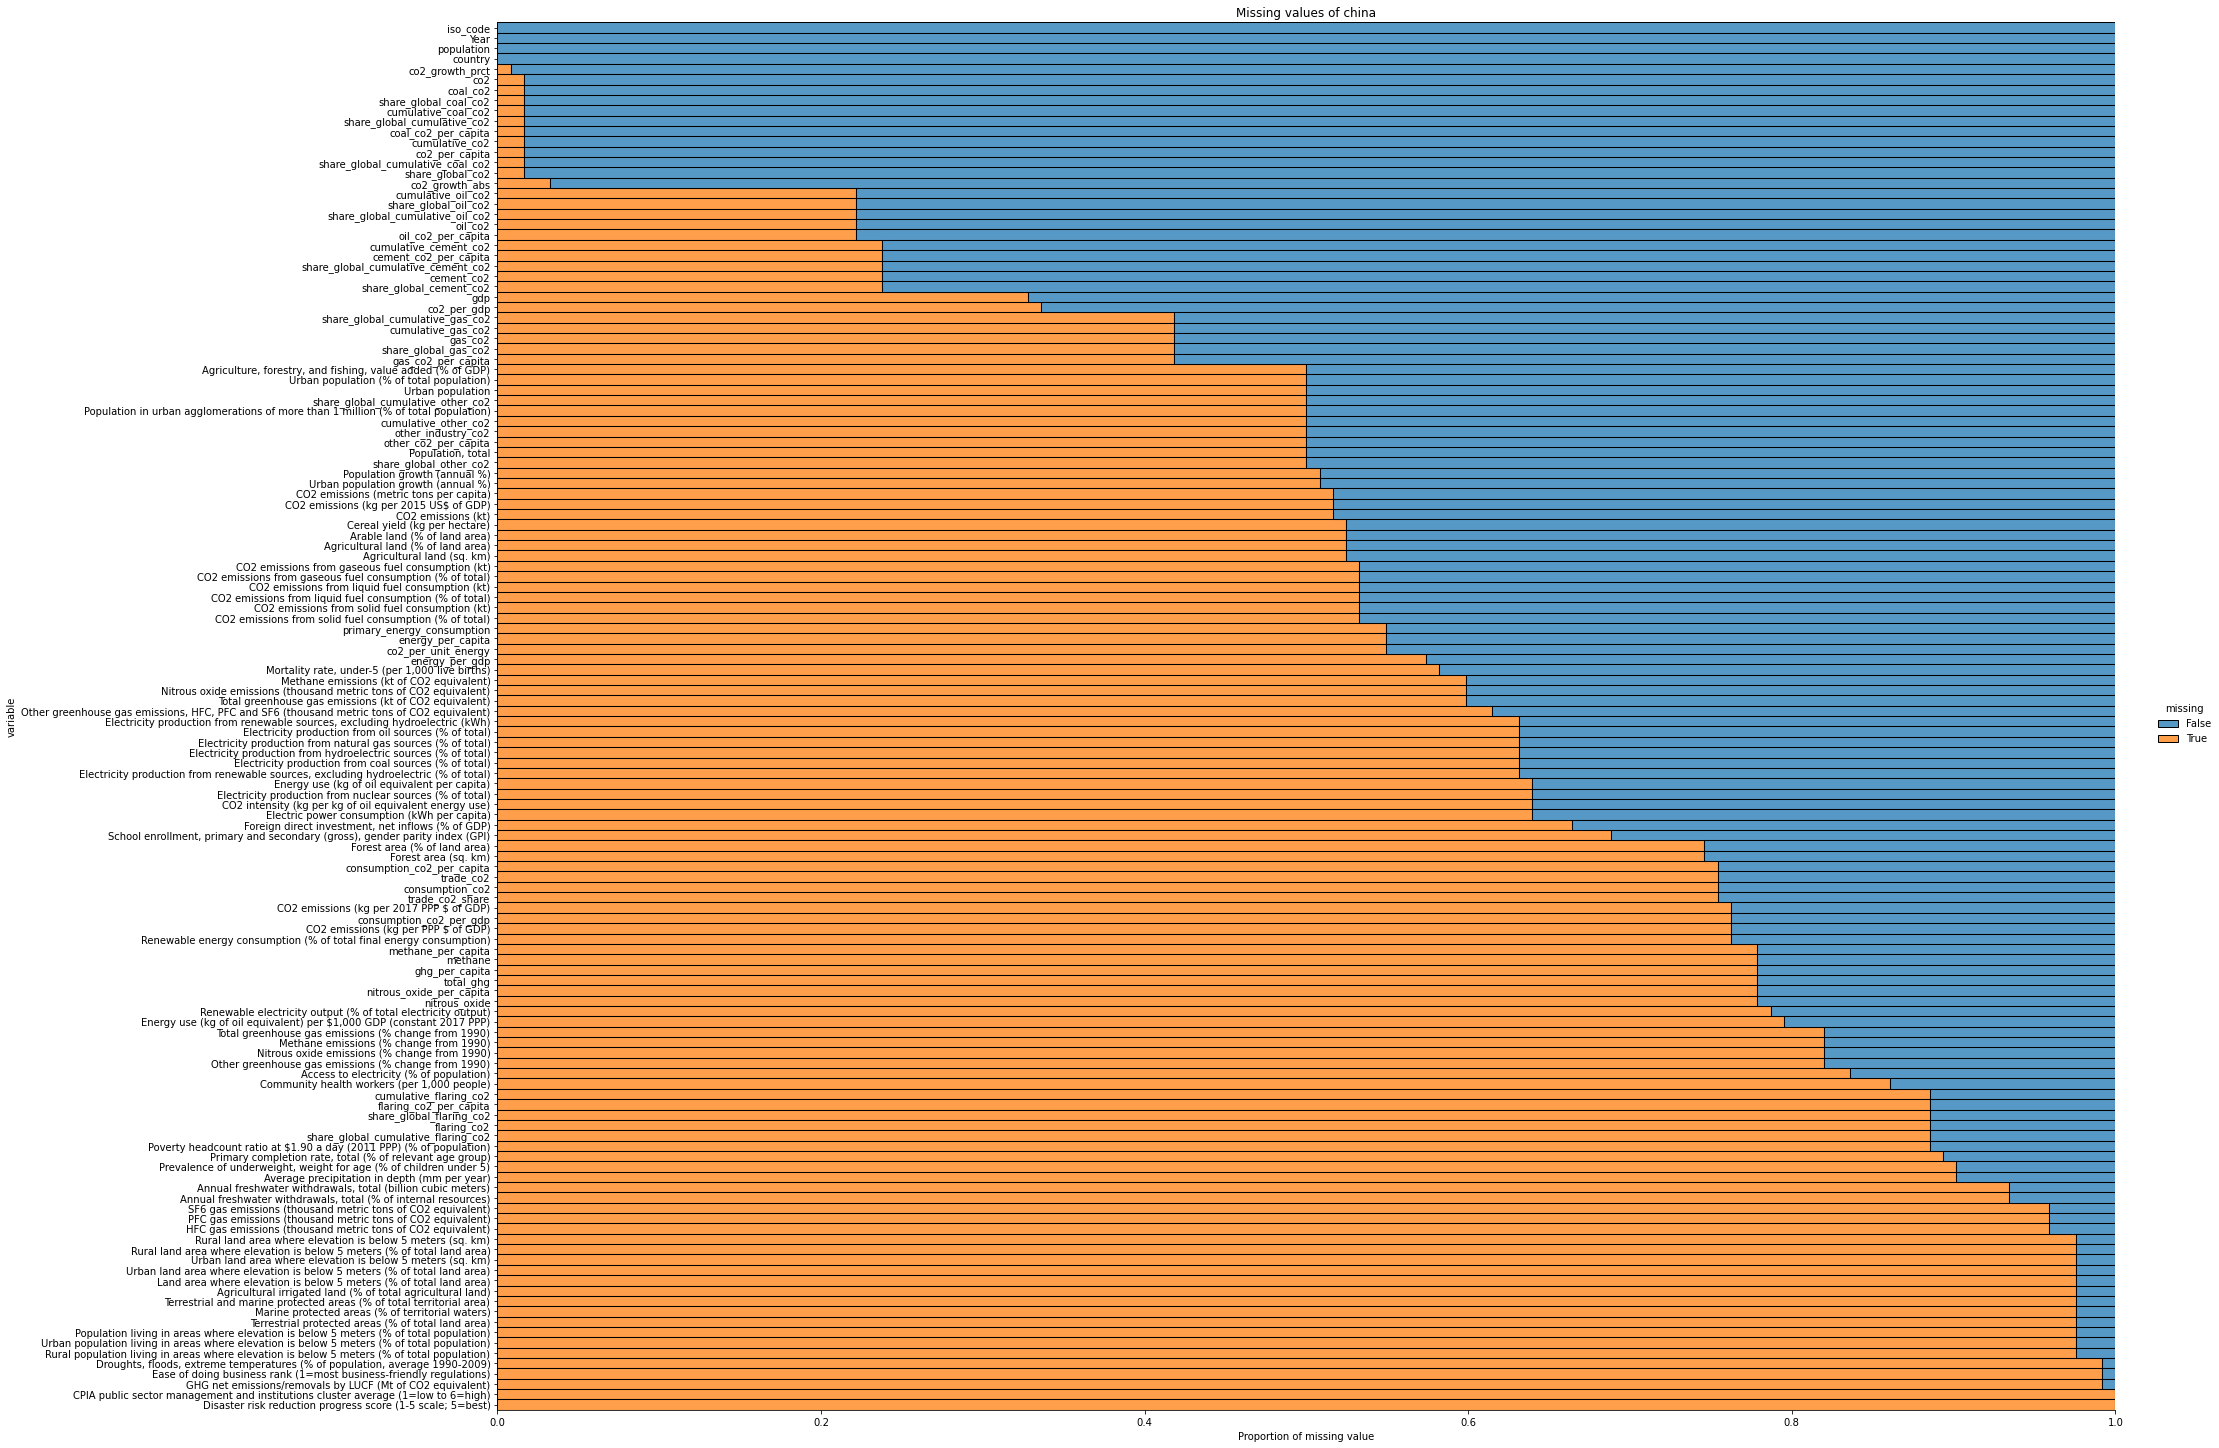

In [74]:
visual_nan(df_china, 'china', sort=True)

In [ ]:
df_owid.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
